In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import time
from collections import deque
from random import random
from ipykernel import kernelapp as app
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

## create a basic data

In [12]:
x = [ 1,2,3,4,5,6,   1,2,3,4,5,6,  1,2,3,4,5,6,   1,2,3,4,5,6 ]
len(x)

24

In [13]:
def generate_random(lb = -0.1, ub = 0.1):
    return (ub-lb)*(np.random.random()) + lb

In [14]:
generate_random()

-0.06761861439397535

<IPython.core.display.Javascript object>


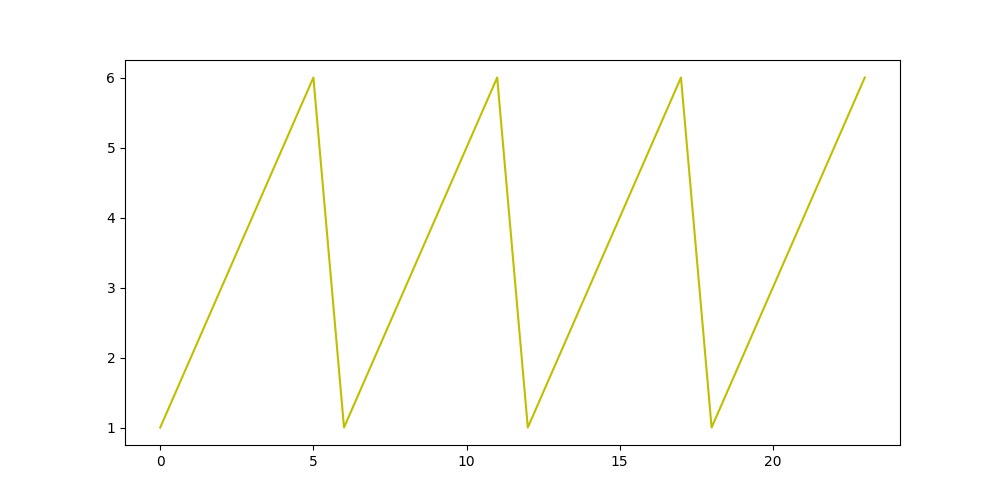

In [15]:
# plt.plot(x)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x, 'y')
# plt.plot([3], [6] , 'r')

In [16]:
def datagen():
  x = [ 1,2,3,4,5,6 ]
  if len(x) >0:
    for y in x:
      yield y
      x.append(y)

In [17]:
def single_exponential_smoothing(x , a=0.5):
  res = [ np.nan , x[0]]
  for i in range( 2 , len(x)+1 ):
    res.append( a*x[i-1] + (1-a)*res[i-1] )
  return res

In [18]:
single_exponential_smoothing(np.arange(1,3))

[nan, 1, 1.5]

In [19]:
def holtwinters(x):
#     model = ExponentialSmoothing(list(x) , trend='add', seasonal_periods=4)
    model = SimpleExpSmoothing(list(x) )
    model_fit = model.fit()
    yhat = model_fit.predict()
    return yhat[0]
#     print(yhat[0])

<IPython.core.display.Javascript object>


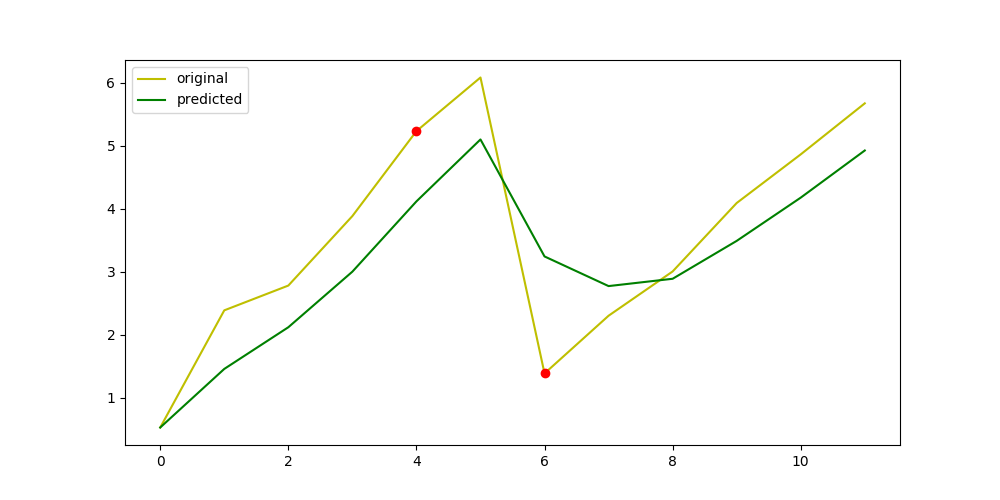

KeyboardInterrupt: 

In [20]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(10,5))
max_len = 100
original = deque(maxlen=max_len)
created = deque(maxlen=max_len)
good_points = {}
anomalous_points = {}

index = 0
ind = []
for i in datagen():
    ind.append(index)
    original.append(i+generate_random(lb=-0.5, ub=0.5))
    created.append(single_exponential_smoothing(original)[-1])
#     if index >20:
#         created.append(holtwinters(original))
# #         plt.plot(ind , created , 'g', label = 'predicted')
#     else:
#         created.append(0)
    
    ax.clear()
    plt.plot(ind , original , 'y', label='original')
    plt.plot(ind , created , 'g', label = 'predicted')
    
    if np.abs(created[-1]- original[-1])>1:
        anomalous_points[index] = original[-1]
    else:
        good_points[index] = original[-1]
    
    for i in anomalous_points.keys():
        plt.plot(i , anomalous_points[i], 'ro')
                
                

    plt.legend()
    fig.canvas.draw()
    fig.show()
    plt.pause(.1)
    index+=1

In [21]:
# model = ExponentialSmoothing(list(original)[:2], trend='add', seasonal_periods=4)
# model_fit = model.fit()
# yhat = model_fit.predict()
# print(yhat[0])

In [22]:
# original

In [18]:
import numpy as np
import rrcf

# A (robust) random cut tree can be instantiated from a point set (n x d)
X = np.random.randn(100, 1)
tree = rrcf.RCTree(X)

# A random cut tree can also be instantiated with no points
tree = rrcf.RCTree()

In [19]:
X.shape

(100, 1)

In [22]:
tree = rrcf.RCTree()

for i in range(6):
    x = np.random.randn(1)
    tree.insert_point(x, index=i)
    print(i , tree, tree.codisp(i))

0 (0)
 0
1 ─+
 ├──(0)
 └──(1)
 1.0
2 ─+
 ├───+
 │   ├──(0)
 │   └──(2)
 └──(1)
 1.0
3 ─+
 ├───+
 │   ├──(3)
 │   └───+
 │       ├──(0)
 │       └──(2)
 └──(1)
 2.0
4 ─+
 ├───+
 │   ├───+
 │   │   ├──(3)
 │   │   └──(4)
 │   └───+
 │       ├──(0)
 │       └──(2)
 └──(1)
 1.0
5 ─+
 ├──(5)
 └───+
     ├───+
     │   ├───+
     │   │   ├──(3)
     │   │   └──(4)
     │   └───+
     │       ├──(0)
     │       └──(2)
     └──(1)
 5.0
